In [27]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

file_path = 'fnb_datav2.csv'

# Read Excel file
data = pd.read_csv(file_path)

# Access data
#print(excel_data.head())  # Assuming you want to print first few rows
display(data)

,idcol,interaction,int_date,item,page,tod,item_type,item_descrip,segment,beh_segment,active_ind
0,755,DISPLAY,17JAN2023,NONE,Screen1,Afternoon,ALL,NaN,segment3,B01,Semi Active
1,4521,DISPLAY,27FEB2023,NONE,Screen1,Afternoon,ALL,NaN,segment1,B07,Semi Active
2,4521,DISPLAY,18FEB2023,NONE,Screen1,Afternoon,ALL,NaN,segment1,B07,Semi Active
3,4521,DISPLAY,30JAN2023,NONE,Screen1,Morning,ALL,NaN,segment1,B07,Semi Active
4,4521,CLICK,05FEB2023,IBAB,Screen1,Afternoon,INSURE,GENERIC MESSAGE,segment1,B07,Semi Active
...,...,...,...,...,...,...,...,...,...,...,...
399995,25728632418,CHECKOUT,19FEB2023,FIWL,Screen1,Evening,INVEST,FNB FIDUCIARY WILLS,segment1,B27,Cold Start
399996,25728632418,CHECKOUT,01FEB2023,FIWL,Screen1,Evening,INVEST,FNB FIDUCIARY WILLS,segment1,B27,Cold Start
399997,25728632418,CLICK,05MAR2023,EVCU,Screen1,Afternoon,TRANSACT,E-VIRTUAL CARD UTILITY,segment1,B27,Cold Start
399998,25728632418,CLICK,30MAR2023,CBEL,Screen1,Early,CONNECT,PREPAID ELECTRICITY,segment1,B27,Cold Start


Find repeated Item descriptions

In [28]:
# Drop duplicates to get unique item and item_descrip pairings
unique_items = data[['item', 'item_descrip']].drop_duplicates().reset_index(drop=True)

# Display the unique items and their descriptions
#display(unique_items)
# Display the unique items and their descriptions using tabulate
print(tabulate(unique_items, headers='keys', tablefmt='pretty'))


+-----+--------+---------------------------+
|     |  item  |       item_descrip        |
+-----+--------+---------------------------+
|  0  |  NONE  |            nan            |
|  1  |  IBAB  |      GENERIC MESSAGE      |
|  2  |  CAFM  |     FUSION MIGRATION      |
|  3  |  CARF  |    REVOLVING FACILITY     |
|  4  |  FIWL  |    FNB FIDUCIARY WILLS    |
|  5  |  CUSS  |     CUST SHARE SAVER      |
|  6  |  EBSH  |       EBUCKS  SHOP        |
|  7  |  FILS  |        LIFE SIMPLI        |
|  8  |  CTLN  |   DDA TEMP LOANS BATCH    |
|  9  |  CCLI  |     ZFN LIM INCREASE      |
| 10  |  CBPB  |         POWERBALL         |
| 11  |  CSPL  |        SMART SPEND        |
| 12  |  CASD  |    SMART DEVICE OFFER     |
| 13  |  CUPL  |       PLS NEW LOAN        |
| 14  |  IBAM  |  COVER YOUR WHOLE FAMILY  |
| 15  |  MMSM  | MONEY MANAGEMENT_SENDMONE |
| 16  |  FIHC  |     HEALTH CASH PLAN      |
| 17  |  CCCS  |       ZFN CARD SWOP       |
| 18  |  CUSZ  |        SHARES ZERO        |
| 19  |  I

In [29]:

# Group by 'item_descrip' and count the unique 'item' entries
item_description_counts = data.groupby('item_descrip')['item'].nunique()

# Filter to get only the descriptions that are shared by more than one item
shared_descriptions = item_description_counts[item_description_counts > 1]

# Convert to DataFrame for better display
shared_descriptions_df = shared_descriptions.reset_index()

# Display the shared descriptions and their counts using tabulate
print(tabulate(shared_descriptions_df, headers=['item_descrip', 'unique_items_count'], tablefmt='pretty'))

+---+---------------------------+--------------------+
|   |       item_descrip        | unique_items_count |
+---+---------------------------+--------------------+
| 0 |      GENERIC MESSAGE      |         2          |
| 1 | HOMELOANS GENERIC MESSAGE |         3          |
+---+---------------------------+--------------------+


In [30]:

# Group by 'item_descrip' and count the unique 'item' entries
item_description_counts = data.groupby('item_descrip')['item'].nunique()

# Filter to get only the descriptions that are shared by more than one item
shared_descriptions = item_description_counts[item_description_counts > 1].index

# Filter the original data to include only rows with these shared descriptions
shared_items_data = data[data['item_descrip'].isin(shared_descriptions)]

# Drop duplicates to show unique pairings of item and item_descrip
unique_shared_items = shared_items_data[['item', 'item_descrip']].drop_duplicates()

# Get the list of items with shared descriptions
shared_items = unique_shared_items['item'].unique()

# Count the occurrences of these items in the whole dataset
item_counts = data['item'].value_counts()

# Filter to get counts of only the shared items
shared_item_counts = item_counts[item_counts.index.isin(shared_items)]

# Convert to DataFrame for tabulate
shared_item_counts_df = shared_item_counts.reset_index()
shared_item_counts_df.columns = ['item', 'count']

# Display the counts using tabulate
print(tabulate(shared_item_counts_df, headers=['item', 'count'], tablefmt='pretty'))

+---+------+-------+
|   | item | count |
+---+------+-------+
| 0 | IBAA | 8771  |
| 1 | IBAB | 6990  |
| 2 | HLGG | 1015  |
| 3 | HLGH |  447  |
| 4 | HLGE |  79   |
+---+------+-------+


In [31]:
# Group by 'item_descrip' and count the unique 'item' entries
item_description_counts = data.groupby('item_descrip')['item'].nunique()

# Filter to get only the descriptions that are shared by more than one item
shared_descriptions = item_description_counts[item_description_counts > 1].index

# Filter the original data to include only rows with these shared descriptions
shared_items_data = data[data['item_descrip'].isin(shared_descriptions)]

# Drop duplicates to show unique pairings of item and item_descrip
unique_shared_items = shared_items_data[['item', 'item_descrip']].drop_duplicates()

# Display the shared descriptions and their corresponding items using tabulate
print(tabulate(unique_shared_items, headers=['item', 'item_descrip'], tablefmt='pretty'))

+------+------+---------------------------+
|      | item |       item_descrip        |
+------+------+---------------------------+
|  4   | IBAB |      GENERIC MESSAGE      |
|  93  | IBAA |      GENERIC MESSAGE      |
| 1180 | HLGH | HOMELOANS GENERIC MESSAGE |
| 1630 | HLGG | HOMELOANS GENERIC MESSAGE |
| 4509 | HLGE | HOMELOANS GENERIC MESSAGE |
+------+------+---------------------------+


Show item and interactions available per screen

In [32]:
# Create a DataFrame for Screen1 and Screen2 interactions
screen_interactions = pd.DataFrame({
    'page': ['Screen1', 'Screen1', 'Screen2', 'Screen2'],
    'item': ['INTERACTION', 'INTERACTION', 'INTERACTION', 'INTERACTION'],
    'count': [data[data['page'] == 'Screen1']['interaction'].count(), 0, 
              data[data['page'] == 'Screen2']['interaction'].count(), 0]
})

# Group by 'page', 'interaction', and 'item' and count the occurrences
interaction_counts = data.groupby(['page', 'interaction', 'item']).size().reset_index(name='count')

# Define a function to apply conditional formatting
def highlight_max_min(data):
    # Create an empty DataFrame with the same index and columns as the input DataFrame
    attr = pd.DataFrame('', index=data.index, columns=data.columns)
    # Apply styles
    attr[data == 0] = 'color: red;'
    max_val = data.max().max()
    attr[data == max_val] = 'color: green; font-weight: bold;'
    return attr

# Apply the conditional formatting
styled_table = interaction_counts.pivot_table(index=['page', 'interaction'], columns='item', values='count', aggfunc='sum', fill_value=0).style.apply(highlight_max_min, axis=None).format('{:.2f}')

# Display the styled table
styled_table


In [62]:
# Group by idcol (user ID) and count unique items per user
user_item_counts = data.groupby('idcol')['item'].nunique()

# Calculate max, min, and average number of unique items
max_unique_items = user_item_counts.max()
min_unique_items = user_item_counts.min()
avg_unique_items = user_item_counts.mean()

# Find users with max and min unique items
user_max_items = user_item_counts.idxmax()
user_min_items = user_item_counts.idxmin()

print(f"Max unique items: {max_unique_items} (User: {user_max_items})")
print(f"Min unique items: {min_unique_items} (User: {user_min_items})")
print(f"Average unique items: {avg_unique_items}")

# Optional: If you want a list of users who interacted with the max/min number of items
users_with_max_items = user_item_counts[user_item_counts == max_unique_items].index.tolist()
users_with_min_items = user_item_counts[user_item_counts == min_unique_items].index.tolist()

print(f"Users with max unique items: {users_with_max_items}")
print(f"Users with min unique items: {users_with_min_items}")

Max unique items: 28 (User: 77196041)
Min unique items: 1 (User: 755)
Average unique items: 2.010619259259259
Users with max unique items: [77196041]
Users with min unique items: [755, 6145, 7125, 8469, 13768, 15784, 22210, 22896, 22924, 22938, 25045, 25577, 31023, 31653, 36875, 42895, 44925, 54627, 61907, 65148, 68095, 73135, 78182, 91041, 96088, 98972, 100568, 103634, 108366, 109087, 113154, 119797, 121365, 130010, 138158, 141189, 141364, 142498, 143471, 144052, 148497, 151430, 152466, 154839, 155182, 155553, 161335, 166011, 166172, 166823, 167145, 168391, 171954, 174572, 190700, 195782, 198477, 201662, 214374, 214640, 215179, 218245, 218315, 218525, 222886, 224566, 226554, 228171, 228948, 230712, 231790, 233477, 238748, 243501, 245755, 250767, 252251, 254729, 262576, 263024, 267581, 275799, 280860, 281728, 282638, 285249, 286040, 286551, 286985, 289533, 290072, 290499, 290828, 293887, 303911, 306536, 308461, 314943, 318191, 319682, 322328, 330609, 330644, 333857, 334431, 338064, 338

Pivot to wide data format: (All items for each id)

In [68]:
# Pivot the DataFrame from long to wide format
wide_data = data.pivot_table(index=['idcol'], columns=['item'], aggfunc='size', fill_value=0)

# Reset the index to make 'segment' a column again (optional)
wide_data.reset_index(inplace=True)

# Rename the index column
wide_data.rename_axis(None, axis=1, inplace=True)

# Display the wide-format data
display(wide_data)



,idcol,CABC,CACU,CAFB,CAFI,CAFM,CAFS,CAFU,CALI,CANL,...,MMMC,MMSM,NACS,NAFW,NASD,NATR,NONE,SEVP,WHCR,XCFL
0,755,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4521,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2,6145,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
3,7125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8469,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84370,25685663618,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
84371,25693117918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
84372,25705258018,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
84373,25721743718,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Interactions for user ID 77196041 (only non-zero values):
          idcol  CABC  CACU  CBEL  CBPB  CBVC  CTLN  CUHS  CUSS  CUSZ  ...  \
33168  77196041     2     5     1     4     4     6     2     2     2  ...   

       IBAB  IBPP  IPRA  IPTF  MMMC  MMSM  NAFW  NATR  NONE  SEVP  
33168     2     2     2     2     2     2     4     1     4     2  

[1 rows x 29 columns]


In [77]:
user_id = 77196041

user_data = wide_data[wide_data['idcol'] == user_id]
if not user_data.empty:
    # Filter out columns with 0 values
    non_zero_items = user_data.loc[:, (user_data != 0).any(axis=0)]
    print(f"Interactions for user ID {user_id} (only non-zero values):")
    non_zero_items = non_zero_items.drop(columns=['idcol'])
    item_names = non_zero_items.columns.tolist()
    print(len(item_names))
else:
    print(f"No data found for user ID {user_id}")

Interactions for user ID 77196041 (only non-zero values):
28


Item popularity

In [45]:
# Calculate the total count of items
total_items = len(data)

# Calculate the total count of each item
item_counts = data['item'].value_counts().reset_index()
item_counts.columns = ['item', 'count']

# Calculate the probability score for each item
item_counts['probability'] = item_counts['count'] / total_items

# Sort the items by popularity (count)
sorted_items = item_counts.sort_values(by='count', ascending=False)
# Display the sorted items
print("Overall most popular items: ")
print(sorted_items)

Overall most popular items: 
     item   count  probability
0    NONE  173638     0.434095
1    CTLN   28177     0.070443
2    CUPL    8786     0.021965
3    IBAA    8771     0.021927
4    IBAB    6990     0.017475
..    ...     ...          ...
99   FIWR      48     0.000120
100  IPST      30     0.000075
101  IPFN      19     0.000048
102  IPMX      13     0.000032
103  IPSD       4     0.000010

[104 rows x 3 columns]


Popularity per segment

In [53]:
# Calculate the total count of items
total_items = len(data)

# Calculate the total count of each item per segment
item_counts = data.groupby(['item', 'segment']).size().reset_index(name='count')

# Calculate the probability score for each item per segment
item_counts['probability'] = item_counts['count'] / item_counts.groupby('segment')['count'].transform('sum')

# Pivot the table to have a separate column for each segment
pivot_table = item_counts.pivot(index='item', columns='segment', values=['count', 'probability'])

# Flatten the multi-level column index and adjust column names
pivot_table.columns = ['{}_{}'.format(col[1], col[0]) for col in pivot_table.columns]

# Reorder the columns to group segments together
segment_columns = [col for col in pivot_table.columns if 'count' in col]
probability_columns = [col for col in pivot_table.columns if 'probability' in col]
new_column_order = [col for pair in zip(segment_columns, probability_columns) for col in pair]
pivot_table = pivot_table[new_column_order]

# Sort the items by total count across all segments
total_count_columns = [col for col in pivot_table.columns if 'count' in col]
pivot_table['total_count'] = pivot_table[total_count_columns].sum(axis=1)
pivot_table = pivot_table.sort_values(by='total_count', ascending=False)

# Display the pivot table
print(pivot_table)

      segment1_count  segment1_probability  segment2_count  \
item                                                         
NONE         62711.0              0.385432         38124.0   
CTLN         16246.0              0.099851          5055.0   
CUPL          2860.0              0.017578          1969.0   
IBAA          4136.0              0.025421          1945.0   
IBAB          4287.0              0.026349          1767.0   
...              ...                   ...             ...   
FIWR             3.0              0.000018             6.0   
IPST            22.0              0.000135             8.0   
IPFN             5.0              0.000031             3.0   
IPMX             6.0              0.000037             NaN   
IPSD             NaN                   NaN             NaN   

      segment2_probability  segment3_count  segment3_probability  \
item                                                               
NONE              0.449931         50503.0              0

Item popularity for Behavioural segment

In [56]:
# Specify the beh_segment
specified_beh_segment = 'B10'  # Change this to your desired beh_segment

# Filter data for the specified beh_segment
specified_data = data[data['beh_segment'] == specified_beh_segment]

# Calculate the total count of items for the specified beh_segment
total_items = len(specified_data)

# Calculate the total count of each item
item_counts = specified_data['item'].value_counts().reset_index()
item_counts.columns = ['item', 'count']

# Calculate the probability score for each item
item_counts['probability'] = item_counts['count'] / total_items

# Sort the items by popularity (count)
sorted_items = item_counts.sort_values(by='count', ascending=False)

# Display the sorted items
print(f"Most popular items for beh_segment '{specified_beh_segment}': ")
print(sorted_items)

Most popular items for beh_segment 'B10': 
     item  count  probability
0    NONE   2224     0.466639
1    CTLN    384     0.080571
2    CBPA    156     0.032732
3    IBAC    123     0.025808
4    FIWL    113     0.023710
..    ...    ...          ...
72   CCNC      1     0.000210
73  CBTMT      1     0.000210
74   IPFN      1     0.000210
75   CARF      1     0.000210
76   EBTV      1     0.000210

[77 rows x 3 columns]


Combine behavioural, segment and activity data

In [59]:
# Specify the active_ind and segment
# Specify the segment
specified_segment = 'segment2'  # Change this to your desired segment

# Get unique active_ind values
unique_active_inds = data['active_ind'].unique()

# Dictionary to store sorted items for each active_ind
sorted_items_dict = {}

# Iterate over each unique active_ind
for active_ind in unique_active_inds:
    # Filter data for the specified segment and current active_ind
    specified_data = data[(data['active_ind'] == active_ind) & (data['segment'] == specified_segment)]
    
    # Calculate the total count of items for the specified segment and current active_ind
    total_items = len(specified_data)
    
    # Calculate the total count of each item
    item_counts = specified_data['item'].value_counts().reset_index()
    item_counts.columns = ['item', 'count']
    
    # Calculate the probability score for each item
    item_counts['probability'] = item_counts['count'] / total_items
    
    # Sort the items by popularity (count)
    sorted_items = item_counts.sort_values(by='count', ascending=False)
    
    # Store sorted items in the dictionary
    sorted_items_dict[active_ind] = sorted_items

# Display the sorted items for each active_ind
for active_ind, sorted_items in sorted_items_dict.items():
    print(f"Most popular items for active_ind '{active_ind}' and segment '{specified_segment}': ")
    print(sorted_items)
    print()

Most popular items for active_ind 'Semi Active' and segment 'segment2': 
    item  count  probability
0   NONE  13566     0.491753
1   CTLN   1116     0.040454
2   CUPL    646     0.023417
3   CUPX    559     0.020263
4   IPRA    556     0.020154
..   ...    ...          ...
87  FIWR      3     0.000109
88  EBBF      2     0.000072
89  IPFN      2     0.000072
90  CANL      2     0.000072
91  HLGE      1     0.000036

[92 rows x 3 columns]

Most popular items for active_ind 'Cold Start' and segment 'segment2': 
    item  count  probability
0   NONE  14954     0.674424
1   CTLN    344     0.015514
2   IPTF    341     0.015379
3   CUPL    292     0.013169
4   IPRA    287     0.012944
..   ...    ...          ...
82  CAFU      5     0.000225
83  IBDL      4     0.000180
84  HLGE      2     0.000090
85  EBQB      2     0.000090
86  EBBF      2     0.000090

[87 rows x 3 columns]

Most popular items for active_ind 'Active' and segment 'segment2': 
    item  count  probability
0   NONE   960

In [61]:
# Specify the segment and beh_segment
specified_segment = 'segment1'  # Change this to your desired segment
specified_beh_segment = 'B01'  # Change this to your desired beh_segment

# Get unique active_ind values
unique_active_inds = data['active_ind'].unique()

# Dictionary to store sorted items for each active_ind and beh_segment
sorted_items_dict = {}

# Iterate over each unique active_ind
for active_ind in unique_active_inds:
    # Filter data for the specified segment, active_ind, and beh_segment
    specified_data = data[(data['active_ind'] == active_ind) & 
                          (data['segment'] == specified_segment) &
                          (data['beh_segment'] == specified_beh_segment)]
    
    # Calculate the total count of items for the specified segment, active_ind, and beh_segment
    total_items = len(specified_data)
    
    # Calculate the total count of each item
    item_counts = specified_data['item'].value_counts().reset_index()
    item_counts.columns = ['item', 'count']
    
    # Calculate the probability score for each item
    item_counts['probability'] = item_counts['count'] / total_items
    
    # Sort the items by popularity (count)
    sorted_items = item_counts.sort_values(by='count', ascending=False)
    
    # Store sorted items in the dictionary
    sorted_items_dict[active_ind] = sorted_items

# Display the sorted items for each active_ind
for active_ind, sorted_items in sorted_items_dict.items():
    print(f"Most popular items for active_ind '{active_ind}', segment '{specified_segment}', and beh_segment '{specified_beh_segment}': ")
    print(sorted_items)
    print()

Most popular items for active_ind 'Semi Active', segment 'segment1', and beh_segment 'B01': 
    item  count  probability
0   NONE   8091     0.467067
1   CTLN   1155     0.066674
2   CUPL    369     0.021301
3   IBAA    369     0.021301
4   IBAB    367     0.021186
..   ...    ...          ...
76  EBGM      3     0.000173
77  CAFB      2     0.000115
78  IPTF      2     0.000115
79  EBQB      2     0.000115
80  CAFS      1     0.000058

[81 rows x 3 columns]

Most popular items for active_ind 'Cold Start', segment 'segment1', and beh_segment 'B01': 
    item  count  probability
0   NONE   9147     0.677004
1   CTLN    321     0.023758
2   IBAC    237     0.017541
3   CACU    198     0.014655
4   CUPL    190     0.014063
..   ...    ...          ...
74  EBQF      2     0.000148
73  CUSS      2     0.000148
71  IBDL      2     0.000148
80  EBGM      1     0.000074
81  CCCU      1     0.000074

[82 rows x 3 columns]

Most popular items for active_ind 'Active', segment 'segment1', and beh

Explore data per segment:

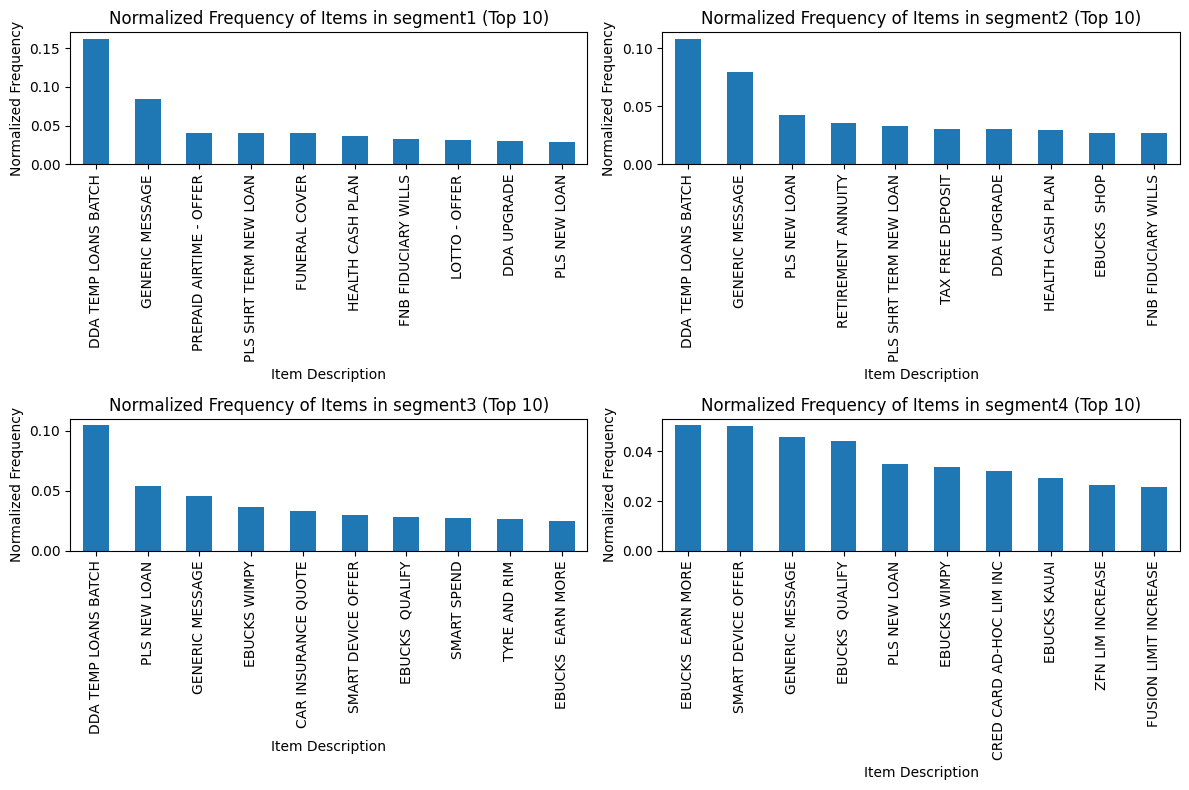

In [34]:
# Sort unique segment values in ascending order
sorted_segments = sorted(data['segment'].unique())

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    # Filter the data to include only rows where 'segment' is equal to the current segment
    segment_data = data[data['segment'] == segment]
    
    # Calculate the frequency of each 'item_descrip' for the segment
    item_beh_counts = segment_data['item_descrip'].value_counts()
    
    # Get the top 10 'item_descrip' based on the total frequency
    top_10_item_beh = item_beh_counts.nlargest(10).index
    
    # Filter the item_descrip_counts series to include only the top 10 'item_descrip'
    top_10_item_counts = item_beh_counts.loc[top_10_item_beh]
    
    # Calculate the total count of all 'item_descrip' entries for the segment
    total_item_descrip_count = segment_data['item_descrip'].count()
    
    # Normalize the frequency of each 'item_descrip' by the total number of all 'item_descrip' entries for the segment
    normalized_top_10_item_counts = top_10_item_counts.div(total_item_descrip_count)
    
    # Plot the normalized frequency of 'item_descrip' for the top 10 'item_descrip' for the current segment
    normalized_top_10_item_counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('Item Description')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of Items in {segment} (Top 10)')

plt.tight_layout()
plt.show()

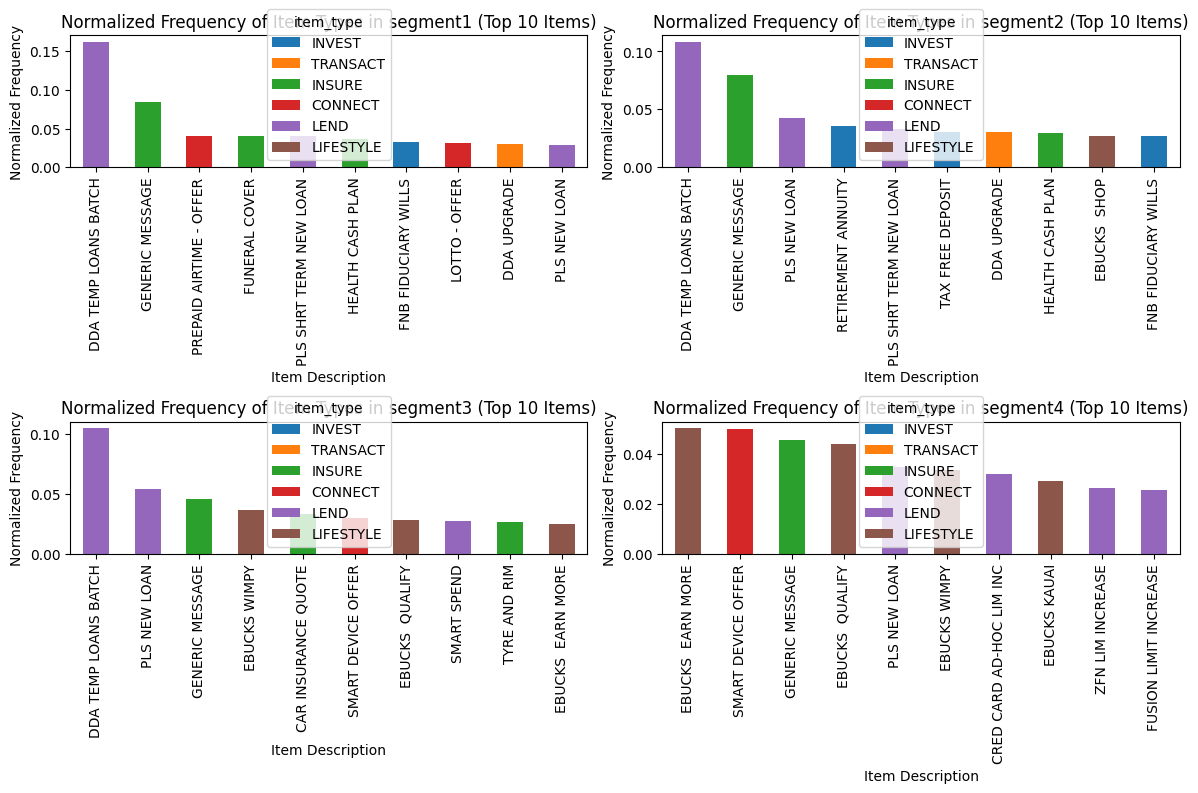

In [35]:
# Sort unique segment values in ascending order
sorted_segments = sorted(data['segment'].unique())

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    # Filter the data to include only rows where 'segment' is equal to the current segment
    segment_data = data[data['segment'] == segment]
    
    # Group the filtered data by 'item_descrip' and 'item_type' and calculate the frequency of each 'item_type' within each 'item_descrip'
    item_counts = segment_data.groupby(['item_descrip', 'item_type']).size().unstack()
    
    # Get the top 10 'item_descrip' based on the total frequency
    top_10_item_beh = item_counts.sum(axis=1).nlargest(10).index
    
    # Filter the item_counts dataframe to include only the top 10 'item_descrip'
    top_10_item_counts = item_counts.loc[top_10_item_beh]
    
    # Calculate the total count of all 'item_descrip' entries for the segment
    total_item_descrip_count = segment_data['item_descrip'].count()
    
    # Normalize the frequency of each 'item_type' within the top 10 'item_descrip' by the total number of all 'item_descrip' entries for the segment
    normalized_top_10_item_counts = top_10_item_counts.div(total_item_descrip_count)
    
    # Plot the normalized frequency of 'item_type' for the top 10 'item_descrip' for the current segment
    normalized_top_10_item_counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Item Description')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of Item Types in {segment} (Top 10 Items)')
    #ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


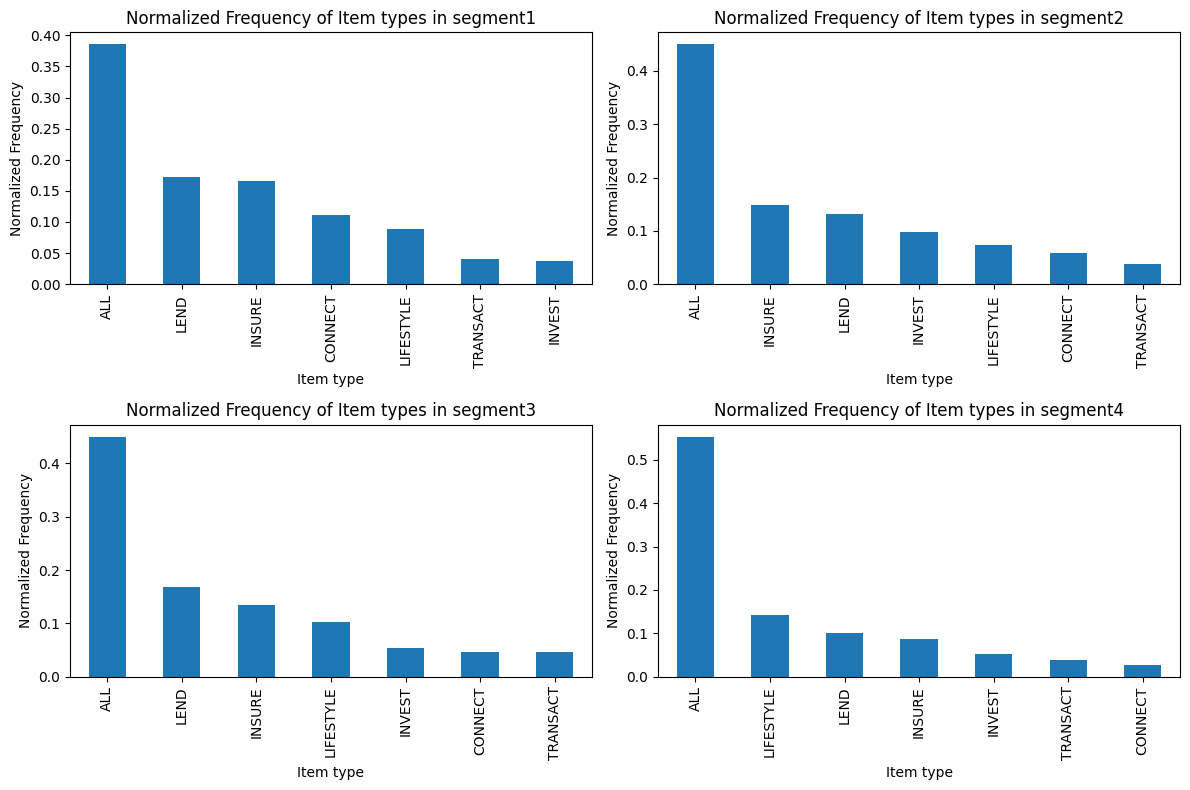

In [36]:
# Sort unique segment values in ascending order
sorted_segments = sorted(data['segment'].unique())

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    # Filter the data to include only rows where 'segment' is equal to the current segment
    segment_data = data[data['segment'] == segment]
    
    # Calculate the frequency of each 'item_descrip' for the segment
    item_type_counts = segment_data['item_type'].value_counts()
        
    # Calculate the total count of all 'item_descrip' entries for the segment
    total_item_count = segment_data['item'].count()
    
    # Normalize the frequency of each 'item_descrip' by the total number of all 'item_descrip' entries for the segment
    normalized_item_types = item_type_counts.div(total_item_count)
    
    # Plot the normalized frequency of 'item_descrip' for the top 10 'item_descrip' for the current segment
    normalized_item_types.plot(kind='bar', ax=ax)
    ax.set_xlabel('Item type')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of Item types in {segment}')

plt.tight_layout()
plt.show()


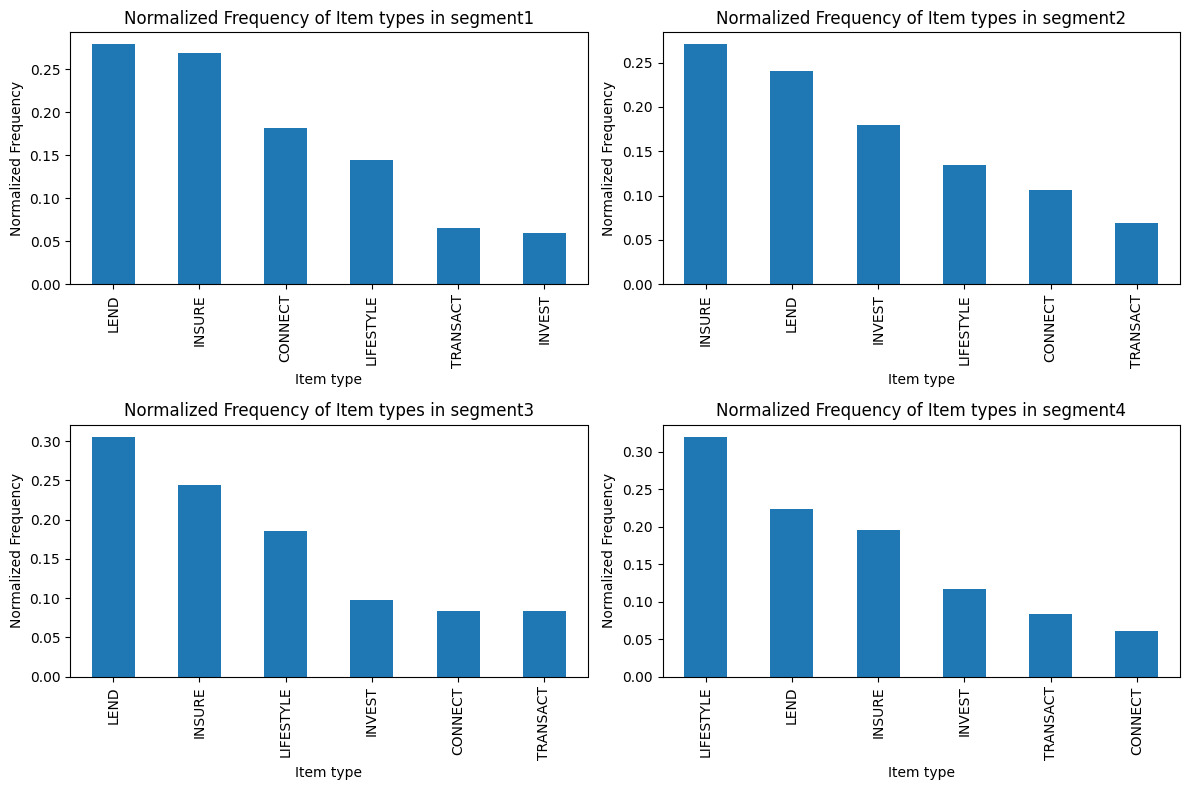

In [37]:
#REMOVE 'ALL' ROWS
# Sort unique segment values in ascending order
sorted_segments = sorted(data['segment'].unique())

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    # Filter the data to include only rows where 'segment' is equal to the current segment and item_type is not 'ALL'
    segment_data = data[(data['segment'] == segment) & (data['item_type'] != 'ALL')]
    
    # Calculate the frequency of each 'item_type' for the segment
    item_type_counts = segment_data['item_type'].value_counts()
        
    # Calculate the total count of all 'item_type' entries for the segment
    total_item_count = segment_data.shape[0]  # Count the rows in segment_data DataFrame
    
    # Normalize the frequency of each 'item_type' by the total number of all 'item_type' entries for the segment
    normalized_item_types = item_type_counts.div(total_item_count)
    
    # Plot the normalized frequency of 'item_type' for the current segment
    normalized_item_types.plot(kind='bar', ax=ax)
    ax.set_xlabel('Item type')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of Item types in {segment}')

plt.tight_layout()
plt.show()


In [38]:
#overview
item_type_counts = data['item_type'].value_counts()
print(item_type_counts)
item_counts = data['item'].value_counts()
print(item_counts)

item_type
ALL          173638
LEND          62036
INSURE        58043
LIFESTYLE     37982
CONNECT       29369
INVEST        22452
TRANSACT      16480
Name: count, dtype: int64
item
NONE    173638
CTLN     28177
CUPL      8786
IBAA      8771
IBAB      6990
         ...  
FIWR        48
IPST        30
IPFN        19
IPMX        13
IPSD         4
Name: count, Length: 104, dtype: int64


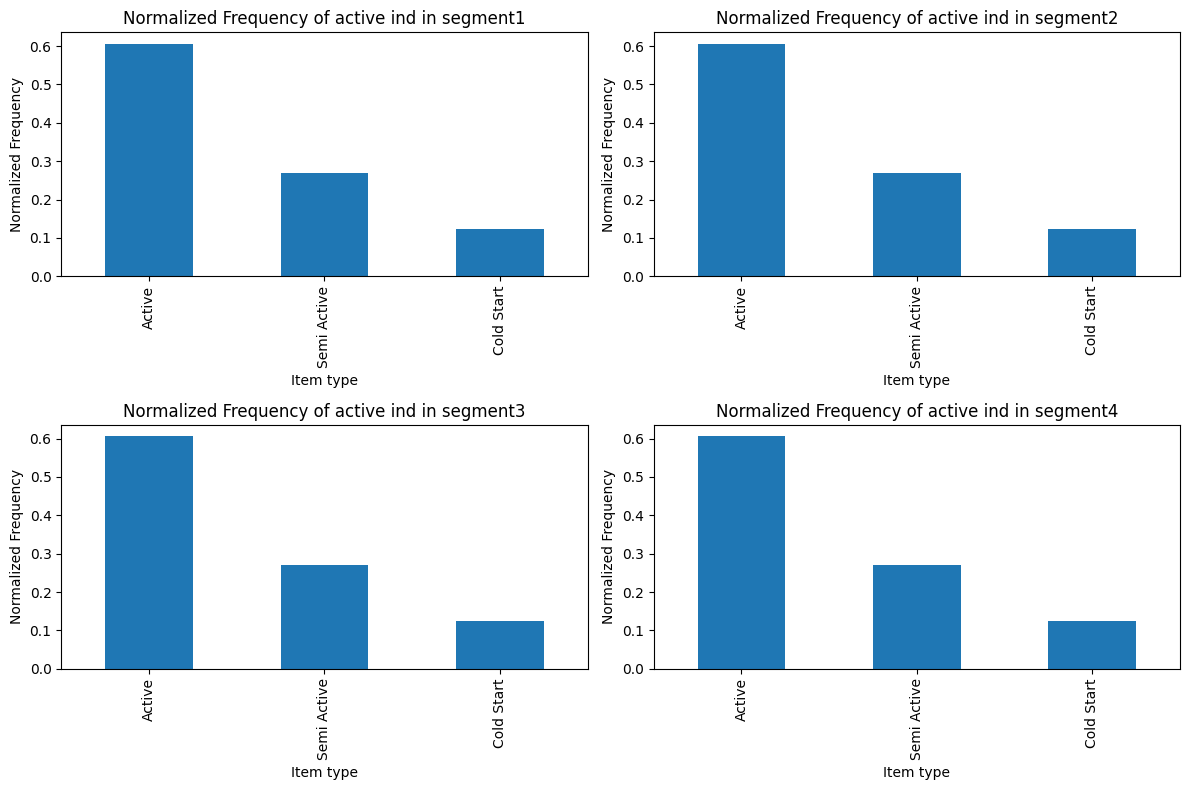

In [39]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    
    # Calculate the frequency of each 'item_type' for the segment
    active_counts = segment_data['active_ind'].value_counts()
        
    # Calculate the total count of all 'item_type' entries for the segment
    total_item_count = segment_data.shape[0]  # Count the rows in segment_data DataFrame
    
    # Normalize the frequency of each 'item_type' by the total number of all 'item_type' entries for the segment
    normalized_active = active_counts.div(total_item_count)
    
    # Plot the normalized frequency of 'item_type' for the current segment
    normalized_active.plot(kind='bar', ax=ax)
    ax.set_xlabel('Item type')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of active ind in {segment}')

plt.tight_layout()
plt.show()


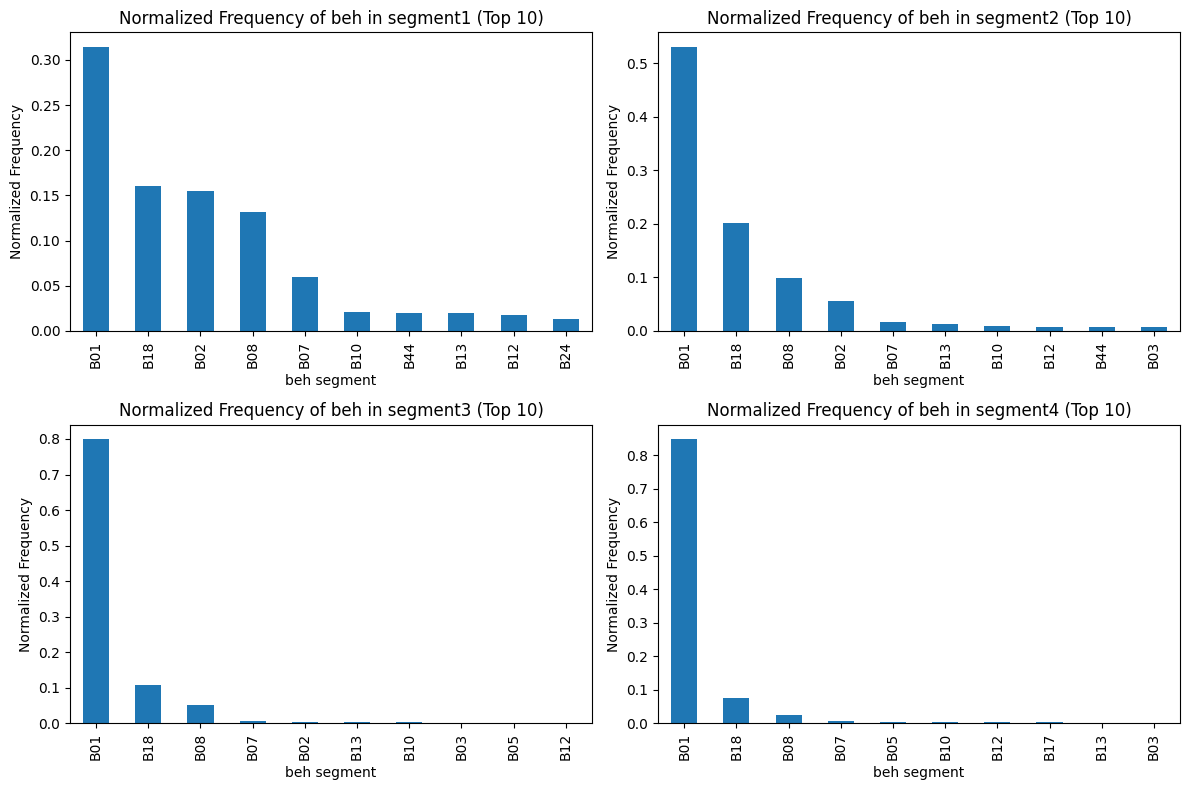

In [40]:
# Sort unique segment values in ascending order
sorted_segments = sorted(data['segment'].unique())

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    # Filter the data to include only rows where 'segment' is equal to the current segment
    segment_data = data[data['segment'] == segment]
    
    # Calculate the frequency of each 'item_descrip' for the segment
    item_beh_counts = segment_data['beh_segment'].value_counts()
    
    # Get the top 10 'item_descrip' based on the total frequency
    top_10_item_beh = item_beh_counts.nlargest(10).index
    
    # Filter the item_descrip_counts series to include only the top 10 'item_descrip'
    top_10_item_counts = item_beh_counts.loc[top_10_item_beh]
    
    # Calculate the total count of all 'item_descrip' entries for the segment
    total_item_beh_count = segment_data['beh_segment'].count()
    
    # Normalize the frequency of each 'item_descrip' by the total number of all 'item_descrip' entries for the segment
    normalized_top_10_item_counts = top_10_item_counts.div(total_item_beh_count)
    
    # Plot the normalized frequency of 'item_descrip' for the top 10 'item_descrip' for the current segment
    normalized_top_10_item_counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('beh segment')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of beh in {segment} (Top 10)')

plt.tight_layout()
plt.show()